In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#Find percentage of nulls per column
#Identify columns above 70 percent
train_nulls = train.isnull().sum()/len(train) * 100
test_nulls= test.isnull().sum()/len(test) * 100
print(train_nulls[train_nulls > 70])
print(test_nulls[train_nulls > 70])

Alley          93.767123
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64
Alley          92.666210
PoolQC         99.794380
Fence          80.123372
MiscFeature    96.504455
dtype: float64


In [4]:
# Remove columns with a lot of nulls
# Also drop Id column as well
test=test.drop(['Id','Alley', 'PoolQC','Fence','MiscFeature'], axis=1)
train=train.drop(['Id','Alley', 'PoolQC','Fence','MiscFeature'], axis=1)

In [5]:
#Split out dependent and independent variables
y = train['SalePrice']
X = train.drop('SalePrice', axis =1)

In [6]:
# Find Columns that need values filled
train_nulls = train.isnull().sum()/len(train) * 100
test_nulls= test.isnull().sum()/len(test) * 100
print(train_nulls[train_nulls > 0])
print(test_nulls[train_nulls > 0])

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64
LotFrontage     15.558602
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinType2     2.878684
Electrical       0.000000
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageQual       5.346127
GarageCond       5.346127
dtype: float64


In [7]:
null_preview = train[['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]
null_preview.head()

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA


In [8]:
# Replace null categorical values with the mode
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0], inplace=True)
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace=True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0], inplace=True)
train['BsmtFinType1'].fillna('none',inplace=True)
train['BsmtFinType2'].fillna('none',inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0], inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0], inplace=True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0], inplace=True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace=True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace=True)

In [9]:
# Replace null numerical values with median
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].median(), inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)

In [10]:
# Check nulls again
train_nulls = train.isnull().sum()/len(train) * 100
test_nulls= test.isnull().sum()/len(test) * 100
print(train_nulls[train_nulls > 0])
print(test_nulls[train_nulls > 0])

Series([], dtype: float64)
Series([], dtype: float64)


In [11]:
#MSSubClass is actually categorical not numerical or ordinal so it should be replaced with dummy variables
#Change column to string so it can get dummy variables
train['MSSubClass'] = train['MSSubClass'].astype(str)

In [12]:
#get dummy variables for categorical columns
train=pd.get_dummies(train, drop_first = True)

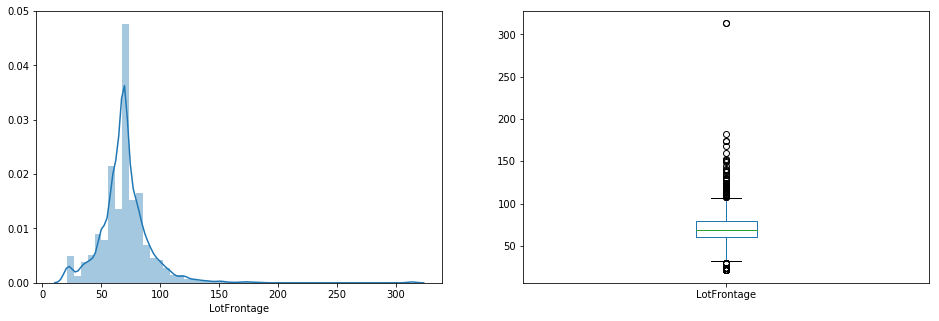

In [14]:
# Check distribution of LotFrontage
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LotFrontage']);

plt.subplot(122)
train['LotFrontage'].plot.box(figsize=(16,5))

plt.show()

In [15]:
#skewed left again needs log transform
train['LotFrontage'] = np.log(train['LotFrontage'])

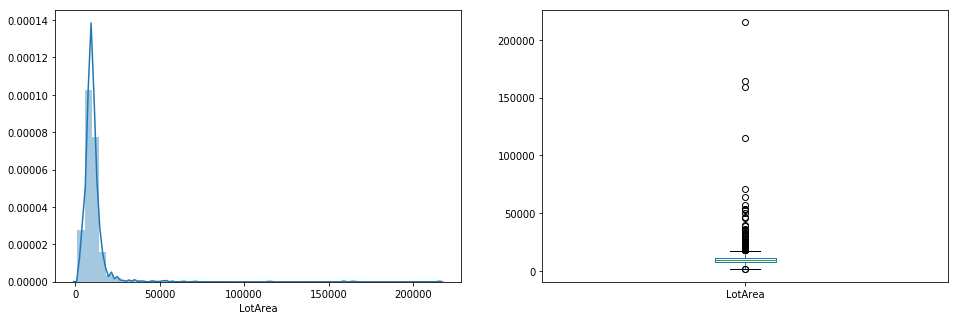

In [16]:
# Check distribution of MasVnrArea
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LotArea']);

plt.subplot(122)
train['LotArea'].plot.box(figsize=(16,5))

plt.show()

In [17]:
#skewed left again needs log transform
train['LotArea'] = np.log(train['LotArea'])

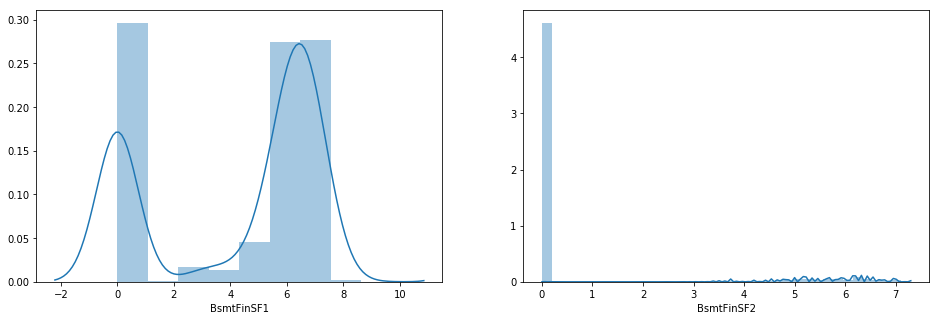

In [28]:
# Check distribution of Basement Finish Types

plt.figure(figsize= (16,5))
fig= plt.subplot
plt.subplot(121)
sns.distplot(train['BsmtFinSF1']);


plt.subplot(122)
sns.distplot(train['BsmtFinSF2'])

plt.show()

In [19]:
#Normalize Data Note: research a better way of handling these data sets
train['BsmtFinSF1'] = train['BsmtFinSF1'] + 1
train['BsmtFinSF1'] = np.log(train['BsmtFinSF1'])
train['BsmtFinSF2'] = train['BsmtFinSF2'] + 1
train['BsmtFinSF2'] = np.log(train['BsmtFinSF2'])

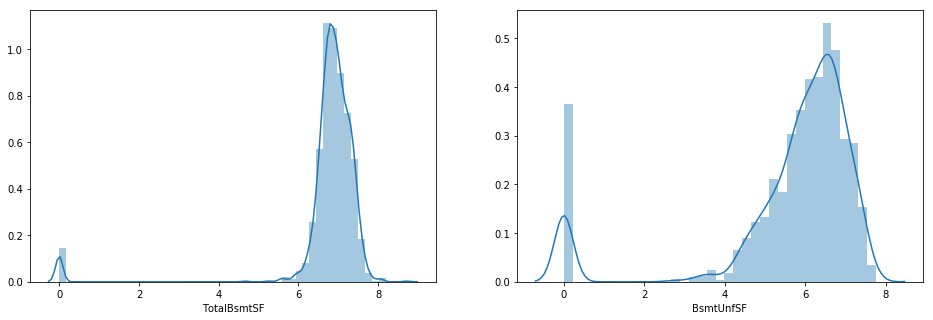

In [29]:
# Check distribution of Basement Square Footage

plt.figure(figsize= (16,5))
fig= plt.subplot
plt.subplot(121)
sns.distplot(train['TotalBsmtSF']);


plt.subplot(122)
sns.distplot(train['BsmtUnfSF'])

plt.show()

In [27]:
#Normalize Data Note: research a better way of handling these data sets with 0 quantites
train['TotalBsmtSF'] = train['TotalBsmtSF'] + 1
train['TotalBsmtSF'] = np.log(train['TotalBsmtSF'])
train['BsmtUnfSF'] = train['BsmtUnfSF'] + 1
train['BsmtUnfSF'] = np.log(train['BsmtUnfSF'])

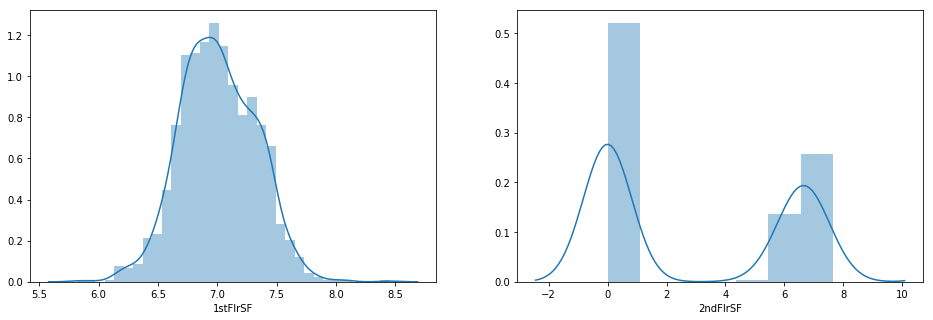

In [33]:
# Check distribution of Floor Square Footage

plt.figure(figsize= (16,5))
fig= plt.subplot
plt.subplot(121)
sns.distplot(train['1stFlrSF']);


plt.subplot(122)
sns.distplot(train['2ndFlrSF'])

plt.show()

In [31]:
# Whether there is a second floor or not is significant so we will make this its own column
train['2ndFlrSF_Y'] = np.where(train['2ndFlrSF'] > 0, 1, 0)

In [32]:
#Normalize Data Note: research a better way of handling these data sets
train['1stFlrSF'] = train['1stFlrSF'] + 1
train['1stFlrSF'] = np.log(train['1stFlrSF'])
train['2ndFlrSF'] = train['2ndFlrSF'] + 1
train['2ndFlrSF'] = np.log(train['2ndFlrSF'])

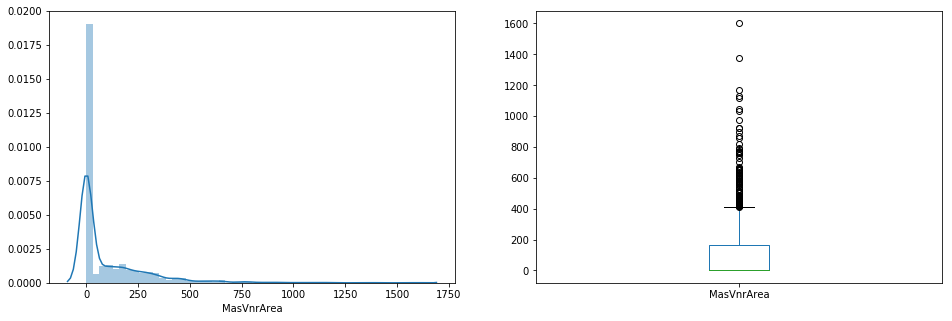

In [21]:
# Check distribution of MasVnrArea
plt.figure(1)
plt.subplot(121)
sns.distplot(train['MasVnrArea']);

plt.subplot(122)
train['MasVnrArea'].plot.box(figsize=(16,5))

plt.show()

In [22]:
# After conducting analysis of the graphs above we can see that a very large quantity is 0 and the data is heavily
# Skewed to the right. A value of 0 implies that the house does not have a Masonry Vaneer so we will make a column
# Representing whether or not they have a masonry vaneer or not
train['MasVnr_Y'] = np.where(train['MasVnrArea'] > 0, 1, 0)

In [23]:
# get log of values because there are outliers and the data is skewed
train['MasVnrArea'] = train['MasVnrArea'] + 1
train['MasVnrArea'] = np.log(train['MasVnrArea'])

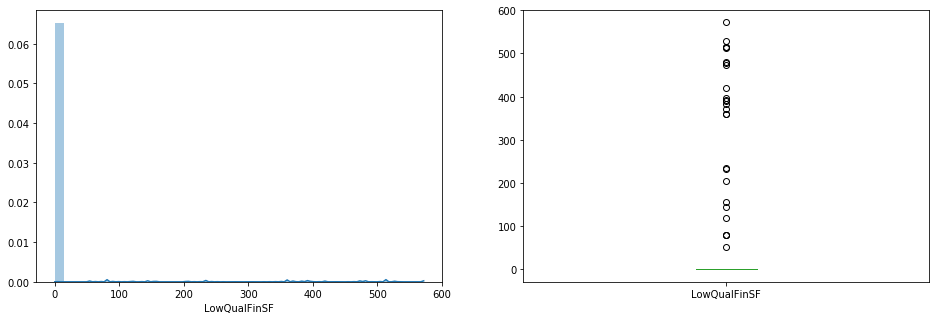

In [35]:
# Check distribution of Low Quality Finish Square Feet
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LowQualFinSF']);

plt.subplot(122)
train['LowQualFinSF'].plot.box(figsize=(16,5))

plt.show()

In [40]:
#turn values into categories
conditions  = [ train['LowQualFinSF'] >= 500,(train['LowQualFinSF'] < 400) & (train['LowQualFinSF']>= 200), (train['LowQualFinSF'] < 200) & (train['LowQualFinSF']> 0), train['LowQualFinSF'] == 0 ]
choices     = [ 'high', 'medium','low','none' ]

train["LowQualFinSF"] = np.select(conditions, choices, default='None')

In [44]:
train=pd.get_dummies(train, drop_first = True)

In [80]:
train.to_csv('transform_train.csv',index = False)

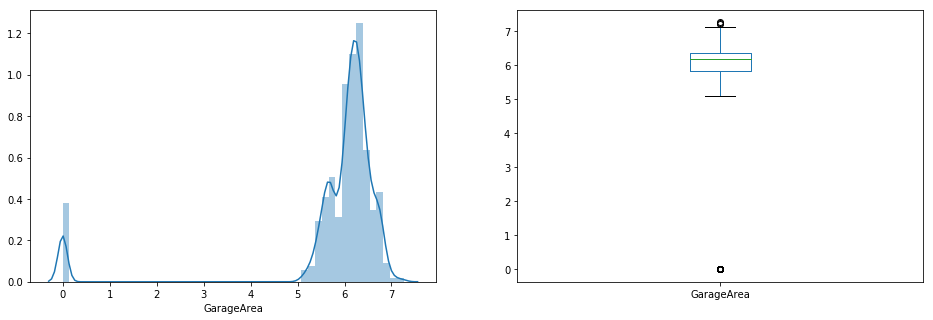

In [48]:
# Check distribution of MasVnrArea
plt.figure(1)
plt.subplot(121)
sns.distplot(train['GarageArea']);

plt.subplot(122)
train['GarageArea'].plot.box(figsize=(16,5))

plt.show()

In [47]:
train['GarageArea'] = train['GarageArea'] + 1
train['GarageArea'] = np.log(train['GarageArea'])

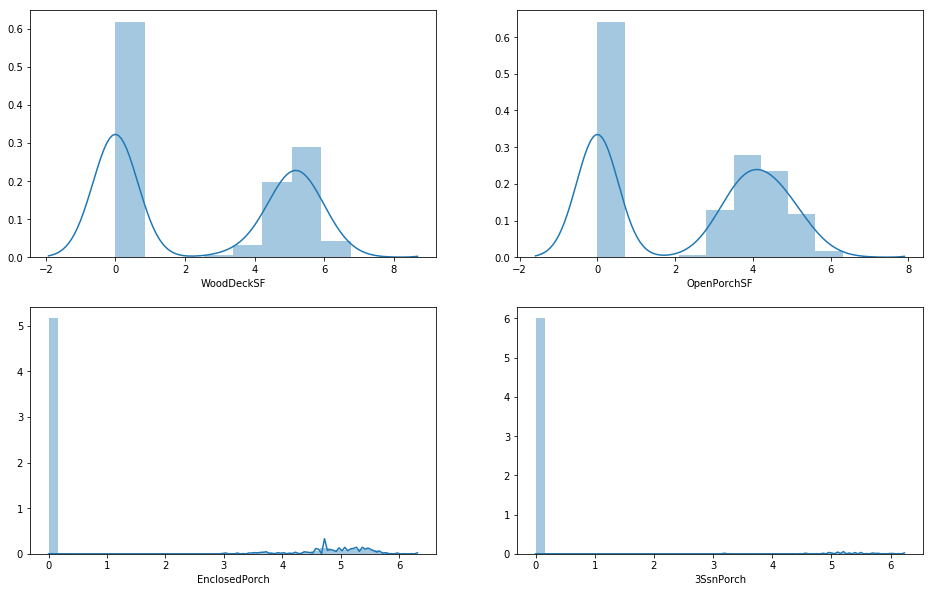

In [52]:
# Check distribution of Porch Square Footage

plt.figure(figsize= (16,10))
fig= plt.subplot
plt.subplot(221)
sns.distplot(train['WoodDeckSF']);


plt.subplot(222)
sns.distplot(train['OpenPorchSF'])


plt.subplot(223)
sns.distplot(train['EnclosedPorch'])


plt.subplot(224)
sns.distplot(train['3SsnPorch'])

plt.show()

In [51]:
#Normalize Data Note: research a better way of handling these data sets
train['WoodDeckSF'] = train['WoodDeckSF'] + 1
train['WoodDeckSF'] = np.log(train['WoodDeckSF'])
train['OpenPorchSF'] = train['OpenPorchSF'] + 1
train['OpenPorchSF'] = np.log(train['OpenPorchSF'])
train['EnclosedPorch'] = train['EnclosedPorch'] + 1
train['EnclosedPorch'] = np.log(train['EnclosedPorch'])
train['3SsnPorch'] = train['3SsnPorch'] + 1
train['3SsnPorch'] = np.log(train['3SsnPorch'])


In [53]:
train['ScreenPorch'] = train['ScreenPorch'] + 1
train['ScreenPorch'] = np.log(train['ScreenPorch'])

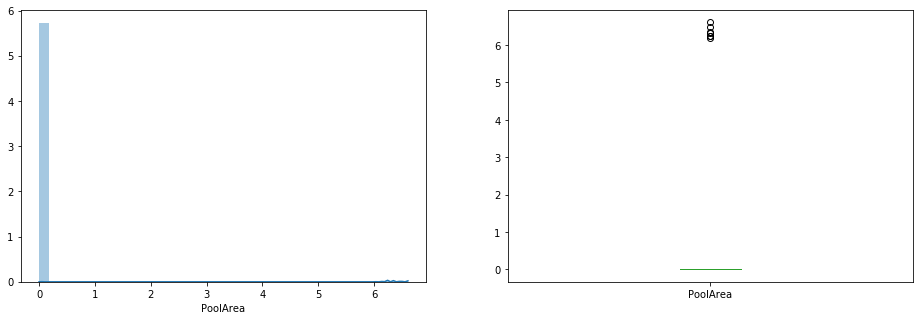

In [57]:
# Check distribution of Pool
plt.figure(1)
plt.subplot(121)
sns.distplot(train['PoolArea']);

plt.subplot(122)
train['PoolArea'].plot.box(figsize=(16,5))

plt.show()

In [55]:
# Whether there is a pool or not is significant so we will make this its own column
train['PoolArea_Y'] = np.where(train['PoolArea'] > 0, 1, 0)

In [56]:
train['PoolArea'] = train['PoolArea'] + 1
train['PoolArea'] = np.log(train['PoolArea'])

In [108]:
y = train['SalePrice']
X = train.drop('SalePrice', axis =1)

In [109]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [110]:
# Fitting multiple linear regression to training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
y_pred = model.predict(x_cv)

In [127]:
y_cv

126     128000
184     127000
916      35311
475     132500
205     180500
950     129000
692     335000
740     132000
1049     84900
1037    287000
638      85000
46      239686
1084    187500
413     115000
1080    145000
875     303477
87      164500
1324    147000
651     108000
828     185000
559     234000
1013     85000
766     196500
59      124900
312     119900
741     142000
835     128000
1095    176432
702     361919
1077    138800
         ...  
487     175000
134     180000
141     260000
944     137500
531     128000
375      61000
1333    125500
973     182000
1353    410000
77      127000
1152    230000
624     165150
757     158900
1058    335000
758     179400
1458    142125
1097    170000
297     239000
907     250000
253     158000
940     150900
895     140000
1342    228500
108     115000
833     167000
286     159000
432     122500
958     185000
821      93000
1247    169900
Name: SalePrice, Length: 438, dtype: int64

In [116]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_cv,y_pred)

21861.997458598802

In [124]:
pred_test = model.predict(test)

ValueError: could not convert string to float: 'RH'